In [48]:
import pandas as pd

df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [49]:
y= df['income']
x= df.drop('income', axis=1)


In [50]:
# convert workclass to categorical
x['workclass']=x['workclass'].astype('category')

# set workclass as ordered categorical
x['workclass']=x['workclass'].cat.as_ordered()

# print current order
x['workclass'].cat.categories

# set new order
x['workclass'].cat.set_categories(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'], ordered=True, inplace=True)

/tmp/ipykernel_17888/3129414039.py:11: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  x['workclass'].cat.set_categories(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'], ordered=True, inplace=True)


In [51]:
x = x.drop('education', axis=1)

In [52]:
# convert marital-status to categorical
x['marital-status']=x['marital-status'].astype('category')

# print current order
x['marital-status'].cat.categories

# set new order
x['marital-status'].cat.set_categories(['Married-spouse-absent', 'Married-AF-spouse', 'Married-civ-spouse', 'Divorced', 'Separated', 'Never-married', 'Widowed' ], ordered=True, inplace=True)

/tmp/ipykernel_17888/2822593468.py:8: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  x['marital-status'].cat.set_categories(['Married-spouse-absent', 'Married-AF-spouse', 'Married-civ-spouse', 'Divorced', 'Separated', 'Never-married', 'Widowed' ], ordered=True, inplace=True)


In [53]:
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = x[col].astype('category')
        x[col] = x[col].cat.codes
    if x[col].dtype.name == 'category':
        x[col] = x[col].cat.codes

In [54]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,0,226802,7,5,7,3,2,1,0,0,40,39
1,38,0,89814,9,2,5,0,4,1,0,0,50,39
2,28,4,336951,12,2,11,0,4,1,0,0,40,39
3,44,0,160323,10,2,7,0,2,1,7688,0,40,39
4,18,-1,103497,10,5,0,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,257302,12,2,13,5,4,0,0,0,38,39
48838,40,0,154374,9,2,7,0,4,1,0,0,40,39
48839,58,0,151910,9,6,1,4,4,0,0,0,40,39
48840,22,0,201490,9,5,1,3,4,1,0,0,20,39


In [55]:
import numpy as np

def distance(x1, x2):
    return np.linalg.norm(x1-x2, axis=1)  # axis=1 means row-wise


In [56]:
x_train = x[:5000]    # use this rows for knn algorithm
y_train = y[:5000]     # first 5000 rows
x_valid = x[5000:6000]  # use this rows for validation
y_valid = y[5000:6000]  # next 1000 rows

In [57]:
y_valid

5000     >50K
5001    <=50K
5002     >50K
5003     >50K
5004    <=50K
        ...  
5995    <=50K
5996    <=50K
5997    <=50K
5998    <=50K
5999    <=50K
Name: income, Length: 1000, dtype: object

In [58]:
sample_data= x_valid.iloc[0]

distances = distance(sample_data, x_train) # an array with all distances from sample_data to all rows in x_train

k=7
nearest_neighbours=distances.argsort()[:k]
y[nearest_neighbours].mode()

0    <=50K
Name: income, dtype: object

In [59]:
def knn(row, x_train, k):
    distances=distance(row, x_train)
    nearest_neighbours=distances.argsort()[:k]
    y_pred=y[nearest_neighbours].mode()
    return y_pred

knn(x_valid.iloc[9], x_train, 7)

0    <=50K
Name: income, dtype: object

In [60]:
y_preds=[]
for i in range(len(x_valid)):
    y_pred=knn(x_valid.iloc[9], x_train, 7)
    y_preds.append(y_pred)

In [61]:
y_preds[0].values[0]

'<=50K'

In [64]:
y_valid.iloc[0]

'>50K'

In [65]:
y_valid=y_valid.values

In [66]:
def get_accuracy(y_preds, y_valid):
    count_correct=0
    for i in range(len(y_preds)):
        if y_preds[i].values[0]==y_valid[i]:
            count_correct+=1
    return count_correct/len(y_preds)*100

print("accuracy: ", get_accuracy(y_preds, y_valid), "%")

accuracy:  75.8 %


In [67]:
def get_predictions(x, x_train, k):
    y_preds=[]
    for i in range(len(x)):
        y_pred=knn(x.iloc[i], x_train, k)
        y_preds.append(y_pred)
    return y_preds

In [68]:
ks=[1, 3, 5, 7, 9, 11, 13, 15]
accs=[]
for i in range(len(ks)):
    k=ks[i]
    y_preds=get_predictions(x_valid, x_train, k)
    acc=get_accuracy(y_preds, y_valid)
    accs.append(acc)

accs


[73.3, 77.7, 77.9, 78.60000000000001, 78.9, 78.5, 78.5, 78.3]

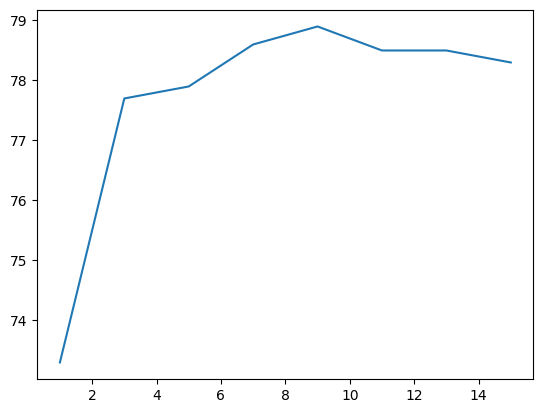

In [69]:
import matplotlib.pyplot as plt
plt.plot(ks, accs)
plt.show()